In [45]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from envs import Maze
from IPython import display
%matplotlib inline

In [3]:
env=Maze()

## Environment Initialization

The Maze environment is a grid-world where an agent (red circle) must navigate to a goal (teal square). The environment follows the standard gym API.

In [9]:
initial_state=env.reset()
print(f"The new episode has started. The agent's initial state is {initial_state}.")

The new episode has started. The agent's initial state is (0, 0).


### Resetting the Environment

The `reset()` method initializes a new episode and returns the starting state $s_0$. In this environment, the state is represented as a tuple $(row, col)$ indicating the agent's position in the grid.

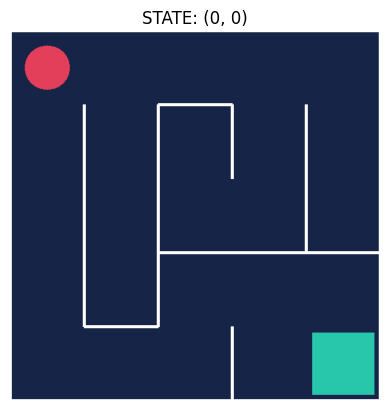

In [10]:
frame=env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"STATE: {initial_state}")
plt.imshow(frame)

### Visualizing the Environment

The maze consists of:
- **Red circle**: The agent's current position
- **Teal square**: The goal state
- **White walls**: Obstacles that block movement

In [11]:
action=2
next_state, reward, done, info=env.step(action)
print(f"After moving down one row, the agent's new state is {next_state}, reward is {reward}, done is {done}, info is {info}.")
print("After moving down one row, the task is","not done yet." if not done else "done.")

After moving down one row, the agent's new state is (1, 0), reward is -1.0, done is False, info is {}.
After moving down one row, the task is not done yet.


## Taking Actions

The agent interacts with the environment using the `step(action)` method, which returns:
- $s_{t+1}$: next state
- $r_t$: reward
- $done$: whether the episode has terminated
- $info$: additional information (dictionary)

Actions are discrete:
- 0: UP
- 1: RIGHT
- 2: DOWN
- 3: LEFT

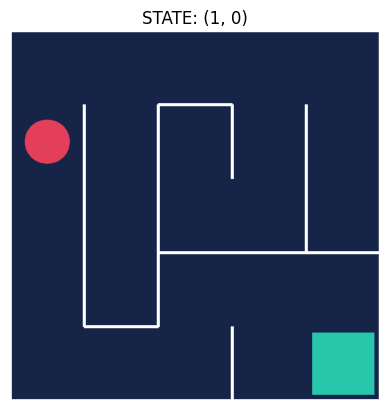

In [12]:
frame=env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"STATE: {next_state}")
plt.imshow(frame)

In [14]:
env.close()

In [21]:
print(f"The state space is of type: {env.observation_space}")
print(f"The action space is of type: {env.action_space}")
print(f"The possible actions are: {list(range(env.action_space.n))}")

The state space is of type: MultiDiscrete([5 5])
The action space is of type: Discrete(4)
The possible actions are: [0, 1, 2, 3]


## State and Action Spaces

Every RL environment defines:
- **Observation Space** $\\mathcal{S}$: The set of all possible states
- **Action Space** $\\mathcal{A}$: The set of all possible actions

In this maze:
- State space: $\\mathcal{S} = \\{0,1,2,3,4\\} \\times \\{0,1,2,3,4\\}$ (5×5 grid)
- Action space: $\\mathcal{A} = \\{0,1,2,3\\}$ (4 discrete actions)

In [28]:
env=Maze()
state=env.reset()
trajectory=[]
for _ in range(3):
    action=env.action_space.sample()
    next_state,reward,done,info=env.step(action)
    trajectory.append((state,action,reward,done,next_state))
    state=next_state
print(f"Sampled trajectory:{trajectory}")


Sampled trajectory:[((0, 0), 2, -1.0, False, (1, 0)), ((1, 0), 2, -1.0, False, (2, 0)), ((2, 0), 2, -1.0, False, (3, 0))]


## Trajectories

A **trajectory** is a sequence of state-action-reward transitions:

$$\\tau = (s_0, a_0, r_0, s_1, a_1, r_1, ..., s_T)$$

where each transition consists of:
- Current state $s_t$
- Action taken $a_t$
- Reward received $r_t$
- Terminal flag $done$
- Next state $s_{t+1}$

In [29]:
env=Maze()
state=env.reset()
done=False
episode=[]
while not done:
    action=env.action_space.sample()
    next_state,reward,done,info=env.step(action)
    episode.append((state,action,reward,done,next_state))
    state=next_state

print(f"Sampled episode:{episode}")

Sampled episode:[((0, 0), 1, -1.0, False, (0, 1)), ((0, 1), 2, -1.0, False, (1, 1)), ((1, 1), 1, -1.0, False, (1, 1)), ((1, 1), 2, -1.0, False, (2, 1)), ((2, 1), 3, -1.0, False, (2, 1)), ((2, 1), 3, -1.0, False, (2, 1)), ((2, 1), 0, -1.0, False, (1, 1)), ((1, 1), 2, -1.0, False, (2, 1)), ((2, 1), 0, -1.0, False, (1, 1)), ((1, 1), 0, -1.0, False, (0, 1)), ((0, 1), 2, -1.0, False, (1, 1)), ((1, 1), 3, -1.0, False, (1, 1)), ((1, 1), 0, -1.0, False, (0, 1)), ((0, 1), 2, -1.0, False, (1, 1)), ((1, 1), 1, -1.0, False, (1, 1)), ((1, 1), 0, -1.0, False, (0, 1)), ((0, 1), 3, -1.0, False, (0, 0)), ((0, 0), 2, -1.0, False, (1, 0)), ((1, 0), 2, -1.0, False, (2, 0)), ((2, 0), 2, -1.0, False, (3, 0)), ((3, 0), 2, -1.0, False, (4, 0)), ((4, 0), 3, -1.0, False, (4, 0)), ((4, 0), 3, -1.0, False, (4, 0)), ((4, 0), 3, -1.0, False, (4, 0)), ((4, 0), 0, -1.0, False, (3, 0)), ((3, 0), 2, -1.0, False, (4, 0)), ((4, 0), 1, -1.0, False, (4, 1)), ((4, 1), 0, -1.0, False, (4, 1)), ((4, 1), 0, -1.0, False, (4, 1)

## Episodes

An **episode** is a complete trajectory from start to termination ($done = True$). 

In episodic tasks like this maze, the agent interacts until reaching a terminal state (the goal). The episode length can vary depending on the agent's actions.

In [30]:
env=Maze()
state=env.reset()
action=env.action_space.sample()
_,reward,_,_=env.step(action)
print(f"Taking a random action {action} from the initial state {state} gives a reward of {reward}.")

Taking a random action 0 from the initial state (0, 0) gives a reward of -1.0.


## Rewards

The **reward function** $R(s, a)$ defines the immediate feedback the agent receives. 

In this maze:
- $r_t = -1$ for each step (encourages shorter paths)
- This creates a penalty for every action, motivating the agent to reach the goal quickly

In [33]:
env=Maze()
state=env.reset()
done=False
G_0=0
gamma=0.99
t=0
while not done:
    action=env.action_space.sample()
    _,reward,done,_=env.step(action)
    G_0+=gamma**t*reward
    t+=1
env.close()
print(f"It took {t} time steps to finish the episode with a return of G_0={G_0}.")

It took 540 time steps to finish the episode with a return of G_0=-99.56045324044636.


## Return (Discounted Cumulative Reward)

The **return** $G_t$ is the total discounted reward from time $t$:

$$G_t = r_t + \\gamma r_{t+1} + \\gamma^2 r_{t+2} + ... = \\sum_{k=0}^{\\infty} \\gamma^k r_{t+k}$$

where:
- $\\gamma \\in [0, 1]$ is the **discount factor**
- $\\gamma = 0$: only immediate rewards matter
- $\\gamma = 1$: all future rewards equally important
- $0 < \\gamma < 1$: exponential decay of future rewards

The discount factor helps with:
- Convergence in infinite-horizon problems
- Modeling uncertainty about the future
- Preferring immediate rewards over delayed ones

In [39]:
def random_policy(state):
    return np.array([0.25]*4) #probability of each action in each state(all the same)

## Policy

A **policy** $\\pi$ defines the agent's behavior by mapping states to actions (or action probabilities):

$$\\pi(a|s) = P(a_t = a | s_t = s)$$

Types of policies:
- **Deterministic**: $a = \\pi(s)$ - always takes the same action in a given state
- **Stochastic**: $\\pi(a|s)$ - probability distribution over actions

Below, we define a uniform random policy where all actions have equal probability.

In [37]:
env=Maze()
state=env.reset()

In [40]:
action_probabilities=random_policy(state)

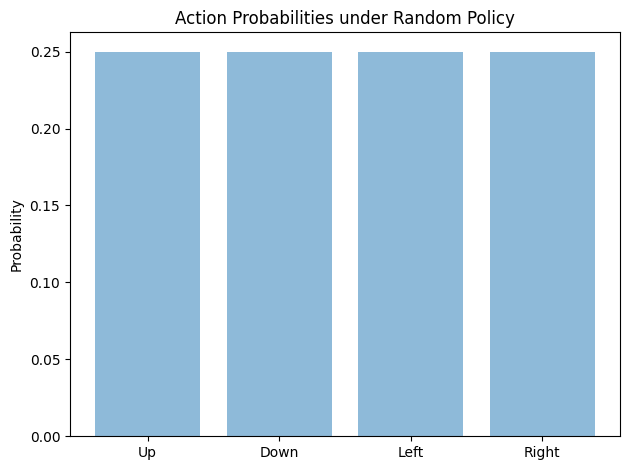

In [41]:
objects=('Up','Down','Left','Right')
y_pos=np.arange(len(objects))

plt.bar(y_pos,action_probabilities,align='center',alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Probability')
plt.title('Action Probabilities under Random Policy')
plt.tight_layout()
plt.show()

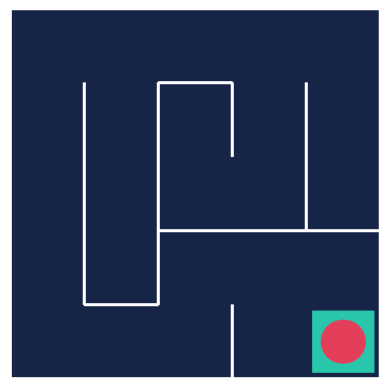

In [48]:
env.reset()
done=False
img=plt.imshow(env.render(mode='rgb_array'))
while not done:
    action=np.random.choice(np.arange(env.action_space.n),p=action_probabilities)
    _,_,done,_=env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
env.close()